In [2]:
import tensorflow as tf
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
tf.test.is_built_with_cuda()

True

# Importing Libraries

In [19]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os.path as op
import pickle

In [20]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Model,Sequential,load_model
from keras.layers import Input, Embedding
from keras.layers import Dense, Bidirectional
from keras.layers.recurrent import LSTM
import keras.metrics as metrics
import itertools
from tensorflow.python.keras.utils.data_utils import Sequence
from decimal import Decimal
from keras import backend as K
from keras.layers import Conv1D,MaxPooling1D,Flatten,Dense

# Data Fetching

In [36]:
inp=pd.read_csv("PJ sensor.csv",usecols=[6,7,10,11])
out=pd.read_csv("PJ sensor.csv",usecols=[2,3,4,5,8,9])

In [37]:
inp.head(5)

,Temperature,Relative Humidity,date,Time
0,31,65,191213,175844
1,31,65,191213,175904
2,31,65,191213,175924
3,31,65,191213,175944
4,31,66,191213,180004


In [38]:
out.head(5)

,NO2,O3,CO,SO2,PM2.5,PM10
0,-15.075377,35.714286,1766.233766,148.484848,11.229150,17.323938
1,-20.100503,41.208791,1733.766234,142.424242,9.413914,24.967407
2,-15.075377,43.956044,1711.038961,136.363636,10.350110,56.781536
3,0.000000,57.692308,1688.311688,139.393939,10.488765,30.371115
4,-20.100503,54.945055,1681.818182,130.303030,12.353048,188.026886


In [39]:
inp=np.array(inp)
out=np.array(out)

# Min Max Scaler

In [40]:
from sklearn.preprocessing import MinMaxScaler
import warnings
scaler_obj=MinMaxScaler()
X1=scaler_obj.fit_transform(inp)
Y1=scaler_obj.fit_transform(out)

warnings.filterwarnings(action='ignore', category=UserWarning)

X1=X1[:,np.newaxis,:]
Y1=Y1[:,np.newaxis,:]

In [41]:
def rmse(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true), axis=-1))

def coeff_determination(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true-y_pred )) 
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) ) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

In [42]:
Y1.shape

(1627533, 1, 6)

# Model

In [12]:
inp=keras.Input(shape=(1,4))

l=keras.layers.Conv1D(6,1,padding="same",activation="relu",kernel_initializer="glorot_uniform")(inp)
 
output = keras.layers.Conv1D(6,4,padding="same",activation='sigmoid')(l)

model1=keras.Model(inputs=inp,outputs=output)
model1.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-5), loss='mse',metrics=['accuracy','mse','mae',rmse])
model1.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 1, 4)]            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 1, 6)              30        
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 1, 6)              150       
Total params: 180
Trainable params: 180
Non-trainable params: 0
_________________________________________________________________


In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X1, Y1, test_size=0.25, random_state=42)

model_fit8 = model1.fit(x_train,y_train,batch_size=2048,epochs=50, validation_split=0.1)

Epoch 1/50
537/537 [==============================] - 3s 5ms/step - loss: 0.1622 - accuracy: 1.8205e-06 - mse: 0.1622 - mae: 0.3484 - rmse: 0.4025 - val_loss: 0.1611 - val_accuracy: 0.0000e+00 - val_mse: 0.1611 - val_mae: 0.3469 - val_rmse: 0.4012
Epoch 2/50
537/537 [==============================] - 3s 5ms/step - loss: 0.1600 - accuracy: 1.8205e-06 - mse: 0.1600 - mae: 0.3455 - rmse: 0.3998 - val_loss: 0.1589 - val_accuracy: 0.0000e+00 - val_mse: 0.1589 - val_mae: 0.3441 - val_rmse: 0.3984
Epoch 3/50
537/537 [==============================] - 3s 5ms/step - loss: 0.1578 - accuracy: 1.8205e-06 - mse: 0.1578 - mae: 0.3426 - rmse: 0.3971 - val_loss: 0.1567 - val_accuracy: 0.0000e+00 - val_mse: 0.1567 - val_mae: 0.3412 - val_rmse: 0.3957
Epoch 4/50
537/537 [==============================] - 3s 5ms/step - loss: 0.1556 - accuracy: 4.0052e-05 - mse: 0.1556 - mae: 0.3398 - rmse: 0.3943 - val_loss: 0.1545 - val_accuracy: 4.8335e-04 - val_mse: 0.1545 - val_mae: 0.3383 - val_rmse: 0.3929
Epoch 5/

Epoch 35/50
537/537 [==============================] - 3s 5ms/step - loss: 0.0733 - accuracy: 0.9969 - mse: 0.0733 - mae: 0.2252 - rmse: 0.2691 - val_loss: 0.0718 - val_accuracy: 0.9971 - val_mse: 0.0718 - val_mae: 0.2229 - val_rmse: 0.2663
Epoch 36/50
537/537 [==============================] - 3s 5ms/step - loss: 0.0703 - accuracy: 0.9969 - mse: 0.0703 - mae: 0.2205 - rmse: 0.2634 - val_loss: 0.0689 - val_accuracy: 0.9971 - val_mse: 0.0689 - val_mae: 0.2181 - val_rmse: 0.2606
Epoch 37/50
537/537 [==============================] - 3s 5ms/step - loss: 0.0674 - accuracy: 0.9969 - mse: 0.0674 - mae: 0.2157 - rmse: 0.2577 - val_loss: 0.0660 - val_accuracy: 0.9971 - val_mse: 0.0660 - val_mae: 0.2133 - val_rmse: 0.2549
Epoch 38/50
537/537 [==============================] - 3s 5ms/step - loss: 0.0645 - accuracy: 0.9969 - mse: 0.0645 - mae: 0.2108 - rmse: 0.2520 - val_loss: 0.0631 - val_accuracy: 0.9971 - val_mse: 0.0631 - val_mae: 0.2084 - val_rmse: 0.2491
Epoch 39/50
537/537 [===============

# Saving Model as File

In [14]:
model_json = model1.to_json()
with open("Model_File/cnnpj.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model1.save_weights("Model_File/cnnpj.h5")
print("Saved model to disk")

Saved model to disk


In [43]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X1, Y1, test_size=0.25, random_state=42)

from keras.models import model_from_json
json_file = open('Model_File/cnnpj.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("Model_File/cnnpj.h5")
print("Loaded model from disk")
loaded_model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-5),loss='mse',metrics=['accuracy','mse','mae',rmse])

Loaded model from disk


In [29]:
loaded_model.evaluate(x_train, y_train, verbose=0)

[0.03316010162234306,
 0.9969671964645386,
 0.03316010162234306,
 0.14898216724395752,
 0.17853641510009766]

In [30]:
loaded_model.evaluate(x_test, y_test, verbose=0)

[0.033225543797016144,
 0.9970065355300903,
 0.033225543797016144,
 0.14912758767604828,
 0.1787092387676239]

# Error Analysis

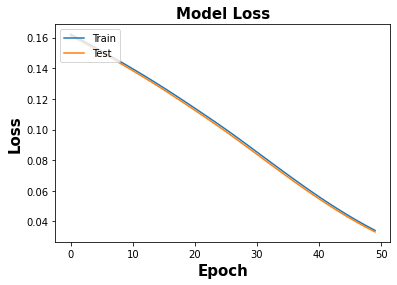

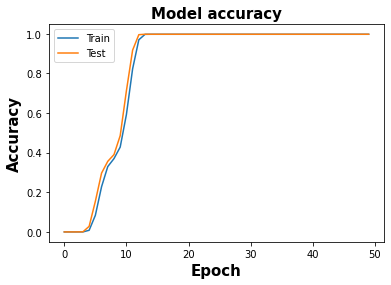

In [18]:
# _,_,_, train_acc = model1.evaluate(x_train, y_train, verbose=0)
# _,_,_, test_acc = model1.evaluate(x_test, y_test, verbose=0)
# print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

# summarize history for loss
plt.plot(model_fit8.history['loss'])
plt.plot(model_fit8.history['val_loss'])
plt.title('Model Loss',fontweight ='bold',fontsize = 15)
plt.ylabel('Loss',fontweight ='bold',fontsize = 15)
plt.xlabel('Epoch',fontweight ='bold',fontsize = 15)
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# summarize history for accuracy
plt.plot(model_fit8.history['accuracy'])
plt.plot(model_fit8.history['val_accuracy'])
plt.title('Model accuracy',fontweight ='bold',fontsize = 15)
plt.ylabel('Accuracy',fontweight ='bold',fontsize = 15)
plt.xlabel('Epoch',fontweight ='bold',fontsize = 15)
plt.legend(['Train', 'Test'], loc='upper left')


In [44]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X1, Y1, test_size=0.25, random_state=42)

y_test_pred=loaded_model.predict(x_test)
y_test_pred

array([[[0.43808302, 0.56855667, 0.1584833 , 0.1675975 , 0.17154044,
         0.25808376]],

       [[0.41159642, 0.5513255 , 0.17057762, 0.19155738, 0.18631211,
         0.25421944]],

       [[0.4498054 , 0.5733056 , 0.16290787, 0.16774252, 0.17482367,
         0.26673895]],

       ...,

       [[0.39849162, 0.55090594, 0.14846292, 0.17212766, 0.1649034 ,
         0.23272184]],

       [[0.40256715, 0.5447718 , 0.17742682, 0.20324522, 0.1937921 ,
         0.25422388]],

       [[0.45196062, 0.54917717, 0.27095214, 0.27875048, 0.27998838,
         0.33630222]]], dtype=float32)

In [45]:
y_test

array([[[0.49655172, 0.61261671, 0.04625328, 0.00839927, 0.07680226,
         0.00349832]],

       [[0.40689655, 0.56779311, 0.02503314, 0.00862807, 0.03923826,
         0.00169898]],

       [[0.48275862, 0.61261671, 0.05669757, 0.01000087, 0.12197674,
         0.0061505 ]],

       ...,

       [[0.4       , 0.53897794, 0.02967504, 0.01022967, 0.04172884,
         0.01677347]],

       [[0.4137931 , 0.56779311, 0.03514586, 0.01114488, 0.06885241,
         0.003031  ]],

       [[0.48275862, 0.57739817, 0.06051056, 0.00908567, 0.10450044,
         0.00542992]]])

In [46]:
y_test=y_test[:,0]
y_test_pred=y_test_pred[:,0]

In [47]:
from numpy import savetxt
savetxt('ARRAY_DATA/cnn_y_test_pred.csv', y_test_pred[:1001], delimiter=',')

In [48]:
from numpy import savetxt
savetxt('ARRAY_DATA/cnn_y_test.csv', y_test[:1001], delimiter=',')

In [ ]:
#completed